Simulate network + arm

In [1]:
import jax
from jax import numpy as np
from jax.lax import scan
from jax import vmap, jit

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_palette("RdYlBu", 8)
import time

import sys
sys.path.append("../src/")
import network_and_arm

/home/mkp127/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
with open("../data/network_s972356.pickle", 'rb') as handle:
    data = pickle.load(handle)
params = data['params']
C = np.asarray(params['C'])
W = np.asarray(data['W'])
hbar = np.asarray(data['hbar'])
phi = lambda x: x 

In [3]:
time_steps = 600
N = W.shape[0]

In [4]:
h0 = params['x0']
theta0 = np.array([10, 143.54]) * np.pi/180
q0 = np.concatenate((theta0, np.zeros((2, ))))
q0 = np.repeat(q0[None], axis=0, repeats=8)
x0 = np.concatenate((np.zeros((8, 2)), h0, q0), axis=1)
inputs = np.zeros((8, time_steps, N))

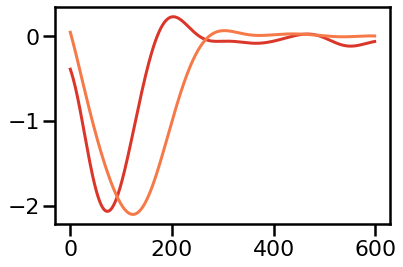

In [8]:
y, h, q = network_and_arm.rollout_batch(x0, inputs)
plt.plot(y[2])